SGD is an update function,i.e it updates the weights base on loss.
SGD is a simple and iterrative alogarithm to use in every alogarithms,its an optimization alogarithm which minimise the loss formula for SGD : wl = wl-1 - d/dx[w1-1]

In [6]:
import warnings 
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import preprocessing
import nltk
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,scorer,auc
from sklearn.cross_validation import cross_val_score,cross_val_predict,train_test_split

import pickle
from sklearn.preprocessing import Normalizer
from tqdm import tqdm
from sklearn.datasets import load_boston
import os
from sklearn.metrics import mean_squared_error,mean_absolute_error

C:\Users\vamshi goud\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
boston_data=pd.DataFrame(load_boston().data,columns=load_boston().feature_names)
Y=load_boston().target
X=load_boston().data
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [4]:
scaler = preprocessing.StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test=scaler.transform(x_test)
train_data=pd.DataFrame(x_train)
train_data['price']=y_train
train_data.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,price
0,2.835282,-0.491225,0.992307,-0.263603,0.862018,-3.087961,1.097588,-1.233393,1.651706,1.519023,0.814208,0.136578,1.511147,11.9
1,-0.463893,0.442318,-0.770731,-0.263603,-1.060199,-1.006243,0.272097,1.977410,-0.303056,-0.486713,0.301758,0.162590,-0.027890,17.6
2,-0.480033,-0.491225,2.380844,-0.263603,0.440480,-0.448256,1.055436,-0.906476,-0.648014,1.787649,0.767621,0.364496,0.762925,13.6


In [32]:
x_test=np.array(x_test)
y_test=np.array(y_test)


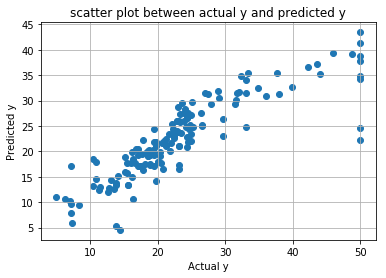

Mean Squared Error : 26.268666968074363
Mean Absolute Error : 3.2725812966494443


In [41]:
clf_ = SGDRegressor()
clf_.fit(x_train, y_train)
plt.scatter(y_test,clf_.predict(x_test))
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('scatter plot between actual y and predicted y')
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, clf_.predict(x_test)))
print('Mean Absolute Error :',mean_absolute_error(y_test, clf_.predict(x_test)))

In [42]:
sklearn_w=clf_.coef_
sklearn_w

array([-0.31623885,  0.62405338, -0.33940747,  0.91327209, -0.94465099,
        2.92057994, -0.26388452, -1.77465285,  0.65101863, -0.4384413 ,
       -1.71822347,  0.95026905, -3.27340517])

In [33]:
def CustomGradientDescentRegressor(train_data,learning_rate=0.001,n_itr=1000,k=10):
    w_cur=np.zeros(shape=(1,train_data.shape[1]-1))
    b_cur=0
    cur_itr=1
    while(cur_itr<=n_itr):
        w_old=w_cur
        b_old=b_cur
        w_temp=np.zeros(shape=(1,train_data.shape[1]-1))
        b_temp=0
        temp=train_data.sample(k)
        #print(temp.head(3))
        y=np.array(temp['price'])
        x=np.array(temp.drop('price',axis=1))
        for i in range(k):
            w_temp+=x[i]*(y[i]-(np.dot(w_old,x[i])+b_old))*(-2/k)
            b_temp+=(y[i]-(np.dot(w_old,x[i])+b_old))*(-2/k)
        w_cur=w_old-learning_rate*w_temp
        b_cur=b_old-learning_rate*b_temp
        if(w_old==w_cur).all():
            break
        cur_itr+=1
    return w_cur,b_cur
def predict(x,w,b):
    y_pred=[]
    for i in range(len(x)):
        y=np.asscalar(np.dot(w,x[i])+b)
        y_pred.append(y)
    return np.array(y_pred)
def plot_(test_data,y_pred):
    #scatter plot
    plt.scatter(test_data,y_pred)
    plt.grid()
    plt.title('scatter plot between actual y and predicted y')
    plt.xlabel('actual y')
    plt.ylabel('predicted y')
    plt.show()      

In [34]:
from sklearn import preprocessing
from math import log
x1_train,x1_test,y1_train,y1_test=train_test_split(X,Y,test_size=0.3)
x1_train,x1_cv,y1_train_,y1_cv_=train_test_split(x1_train,y1_train,test_size=0.3)

x1_train = scaler.transform(x1_train)
x1_cv=scaler.transform(x1_cv)

x1_train_=np.array(x1_train)
x1_train_data=pd.DataFrame(x1_train)
x1_train_data['price']=y1_train_

x1_cv_data=pd.DataFrame(x1_cv)
x1_cv_data['price']=y1_cv_

y1_train_=np.array(y1_train_)
y1_cv_=np.array(y1_cv_)
#print(y1_cv_.shape)

def tuneParams_learning_rate():
    train_error=[]
    cv_error=[]
    r=[0.00001,0.0001,0.001,0.01,0.1]
    for itr in r:
        w,b=CustomGradientDescentRegressor(x1_train_data,learning_rate=itr,n_itr=1000)
       # print(w.shape,b.shape,x1_train_.shape)
        y1_pred_train=predict(x1_train_,w,b)
        train_error.append(mean_squared_error(y1_train_,y1_pred_train))
        w,b=CustomGradientDescentRegressor(x1_cv_data,learning_rate=itr,n_itr=1000)
        y1_pred_cv=predict(x1_cv,w,b)
        cv_error.append(mean_squared_error(y1_cv_,y1_pred_cv))
    return train_error,cv_error 


In [35]:
train_error,cv_error=tuneParams_learning_rate()

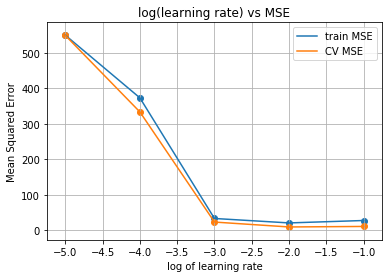

In [36]:
import math
r=[0.00001,0.0001,0.001,0.01,0.1]
x1=[math.log10(i) for i in r]
plt.plot(x1,train_error,label='train MSE')
plt.plot(x1,cv_error,label='CV MSE')
plt.scatter(x1,train_error)
plt.scatter(x1,cv_error)
plt.legend()
plt.xlabel('log of learning rate')
plt.ylabel('Mean Squared Error')
plt.title('log(learning rate) vs MSE')
plt.grid()
plt.show()

In [44]:
custom_w=w
custom_w

array([[-0.37266539,  0.52975235, -0.36724778,  0.82753786, -0.75478987,
         2.50020187, -0.12588132, -1.27671666,  0.45924584, -0.30862882,
        -1.60562484,  0.89304698, -3.13450074]])

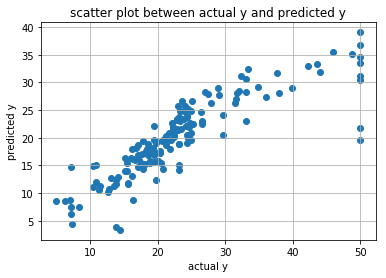

In [37]:
w,b=CustomGradientDescentRegressor(train_data,learning_rate=0.001,n_itr=1000)
y_pred=predict(x_test,w,b)
plot_(y_test,y_pred)

In [45]:
from prettytable import PrettyTable
# MSE = mean squared error
# MAE =mean absolute error
x=PrettyTable()
x.field_names=['Model','Weight Vector','MSE','MAE']
x.add_row(['sklearn',sklearn_w,mean_squared_error(y_test, clf_.predict(x_test)),mean_absolute_error(y_test, clf_.predict(x_test))])
x.add_row(['custom',custom_w,mean_squared_error(y_test,y_pred),(mean_absolute_error(y_test,y_pred))])
print(x)

+---------+---------------------------------------------------------------------------+--------------------+--------------------+
|  Model  |                               Weight Vector                               |        MSE         |        MAE         |
+---------+---------------------------------------------------------------------------+--------------------+--------------------+
| sklearn |  [-0.31623885  0.62405338 -0.33940747  0.91327209 -0.94465099  2.92057994 | 26.268666968074363 | 3.2725812966494443 |
|         |   -0.26388452 -1.77465285  0.65101863 -0.4384413  -1.71822347  0.95026905 |                    |                    |
|         |                                -3.27340517]                               |                    |                    |
|  custom | [[-0.37266539  0.52975235 -0.36724778  0.82753786 -0.75478987  2.50020187 |  37.8976983962042  | 3.8368789564314474 |
|         |   -0.12588132 -1.27671666  0.45924584 -0.30862882 -1.60562484  0.89304698 |   

## Comparision among All Models

In [46]:
sklearn_pred=clf_.predict(x_test)
implemented_pred=y_pred
x=PrettyTable()
x.field_names=['SKLearn SGD predicted value','Implemented SGD predicted value']
for itr in range(15):
    x.add_row([sklearn_pred[itr],implemented_pred[itr]])
print(x)   

+-----------------------------+---------------------------------+
| SKLearn SGD predicted value | Implemented SGD predicted value |
+-----------------------------+---------------------------------+
|      17.313460128106097     |        15.81212754103785        |
|      17.19765834289902      |        16.00423830387952        |
|      18.516601935830668     |        14.906196501144636       |
|      17.842522779628457     |        15.158070874148809       |
|      27.470279931497814     |        24.906418689303635       |
|      24.38589408976268      |        22.18562248868944        |
|      27.54874811512359      |        25.234458854420573       |
|      38.808809240413126     |        34.53172406019749        |
|      25.195924868143294     |        22.71055268846697        |
|      32.698021074592816     |        29.081917799771173       |
|      12.70090633293753      |        10.80677025177268        |
|      34.136545425035926     |        30.656612503050304       |
|      31.